# Experiment 3: Scalability Limits with Leduc Poker

**Objective**: Compare **Monte Carlo CFR** vs **Full-Width CFR** on **Leduc Poker**, a significantly larger game than Kuhn Poker.

**Context**: Leduc Poker involves a larger deck (6 cards, 2 suits), two betting rounds, and community cards. This increases the state space exponentially compared to Kuhn Poker. This experiment tests the **scalability limits** of both approaches.

**Algorithms Compared**:
1. **MCCFR (Vanilla)** - Monte Carlo sampling at chance nodes
2. **MCCFR+** - Monte Carlo with regret flooring + linear averaging
3. **Full-Width CFR (Vanilla)** - Textbook algorithm, full expectation at chance nodes
4. **Full-Width CFR+** - Textbook CFR+ with regret flooring + linear averaging

**Hypothesis**: 
- Full-width CFR will be MUCH slower per iteration (more chance outcomes to traverse)
- But full-width should have better per-iteration convergence
- Trade-off: MCCFR may win in wall-clock time despite worse per-iteration convergence

In [5]:
%matplotlib inline
import pyspiel
import numpy as np
import matplotlib.pyplot as plt
import time
from solvers import CFRSolver, CFRPlusSolver, FullWidthCFRSolver, FullWidthCFRPlusSolver

print("Ready for Leduc Poker experiments!")

Ready for Leduc Poker experiments!


Loading 2-player Leduc Poker...
Training Full-Width CFR (Vanilla)...
Iteration 1000/5000 - NashConv: 0.042714
Iteration 2000/5000 - NashConv: 0.030290
Iteration 3000/5000 - NashConv: 0.025153
Iteration 4000/5000 - NashConv: 0.021432
Iteration 5000/5000 - NashConv: 0.019015
Training Full-Width CFR+...
Iteration 1000/5000 - NashConv: 0.092124
Iteration 2000/5000 - NashConv: 0.069790
Iteration 3000/5000 - NashConv: 0.058558
Iteration 4000/5000 - NashConv: 0.050369
Iteration 5000/5000 - NashConv: 0.045344


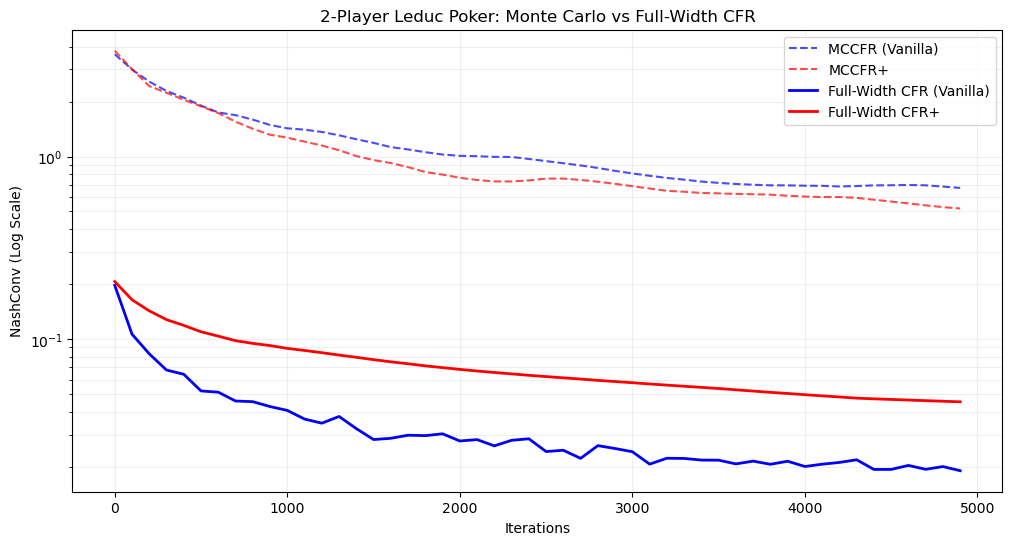


=== 2-Player Leduc Results ===
Algorithm                 Final NashConv     Time (s)  
-------------------------------------------------------
MCCFR (Vanilla)           0.672873           13.90     
MCCFR+                    0.519217           14.05     
Full-Width CFR            0.019015           467.54    
Full-Width CFR+           0.045344           475.93    


In [7]:
# 2-Player Leduc Poker - Compare all 4 variants
print("Loading 2-player Leduc Poker...")
game_2p = pyspiel.load_game("leduc_poker")

iterations = 5000
log_every = 100

# # Monte Carlo variants
# print("Training MCCFR (Vanilla)...")
# start = time.time()
# solver_mc_vanilla = CFRSolver(game_2p)
# history_mc_vanilla = solver_mc_vanilla.train(iterations, log_every=log_every)
# time_mc_vanilla = time.time() - start

# print("Training MCCFR+...")
# start = time.time()
# solver_mc_plus = CFRPlusSolver(game_2p)
# history_mc_plus = solver_mc_plus.train(iterations, log_every=log_every)
# time_mc_plus = time.time() - start

# Full-width variants
print("Training Full-Width CFR (Vanilla)...")
start = time.time()
solver_fw_vanilla = FullWidthCFRSolver(game_2p)
history_fw_vanilla = solver_fw_vanilla.train(iterations, log_every=log_every)
time_fw_vanilla = time.time() - start

print("Training Full-Width CFR+...")
start = time.time()
solver_fw_plus = FullWidthCFRPlusSolver(game_2p)
history_fw_plus = solver_fw_plus.train(iterations, log_every=log_every)
time_fw_plus = time.time() - start

# Plotting
x_axis = np.arange(len(history_mc_vanilla['nash_conv'])) * log_every

plt.figure(figsize=(12, 6))

# Monte Carlo variants (dashed lines)
plt.plot(x_axis, history_mc_vanilla['nash_conv'], 'b--', label="MCCFR (Vanilla)", alpha=0.7)
plt.plot(x_axis, history_mc_plus['nash_conv'], 'r--', label="MCCFR+", alpha=0.7)

# Full-width variants (solid lines)
plt.plot(x_axis, history_fw_vanilla['nash_conv'], 'b-', label="Full-Width CFR (Vanilla)", linewidth=2)
plt.plot(x_axis, history_fw_plus['nash_conv'], 'r-', label="Full-Width CFR+", linewidth=2)

plt.yscale("log")
plt.title("2-Player Leduc Poker: Monte Carlo vs Full-Width CFR")
plt.xlabel("Iterations")
plt.ylabel("NashConv (Log Scale)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print("\n=== 2-Player Leduc Results ===")
print(f"{'Algorithm':<25} {'Final NashConv':<18} {'Time (s)':<10}")
print("-" * 55)
print(f"{'MCCFR (Vanilla)':<25} {history_mc_vanilla['nash_conv'][-1]:<18.6f} {time_mc_vanilla:<10.2f}")
print(f"{'MCCFR+':<25} {history_mc_plus['nash_conv'][-1]:<18.6f} {time_mc_plus:<10.2f}")
print(f"{'Full-Width CFR':<25} {history_fw_vanilla['nash_conv'][-1]:<18.6f} {time_fw_vanilla:<10.2f}")
print(f"{'Full-Width CFR+':<25} {history_fw_plus['nash_conv'][-1]:<18.6f} {time_fw_plus:<10.2f}")

Loading 3-player Leduc Poker...
Training MCCFR (Vanilla)...
Iteration 500/500 - NashConv: 6.523055
Training MCCFR+...
Iteration 500/500 - NashConv: 4.531140
Training Full-Width CFR (Vanilla)...
Iteration 500/500 - NashConv: 0.257997
Training Full-Width CFR+...
Iteration 500/500 - NashConv: 0.336149


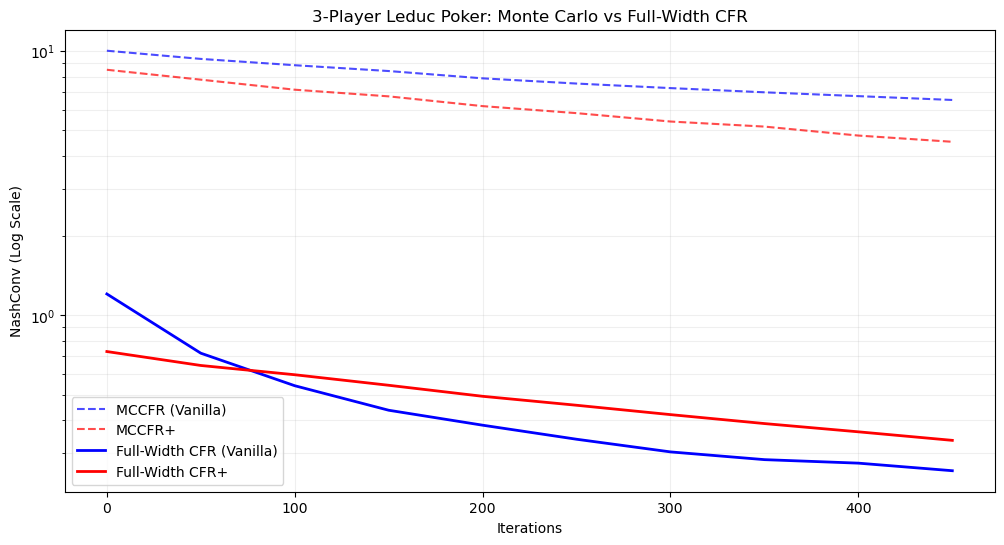


=== 3-Player Leduc Results ===
Algorithm                 Final NashConv     Time (s)  
-------------------------------------------------------
MCCFR (Vanilla)           6.523055           501.11    
MCCFR+                    4.531140           495.39    
Full-Width CFR            0.257997           14813.82  
Full-Width CFR+           0.336149           20591.44  


In [3]:
# 3-Player Leduc Poker - Compare all 4 variants
print("Loading 3-player Leduc Poker...")
game_3p = pyspiel.load_game("leduc_poker", {"players": 3})

# Fewer iterations for 3-player due to larger state space
iterations = 500
log_every = 50

# Monte Carlo variants
print("Training MCCFR (Vanilla)...")
start = time.time()
solver_mc_vanilla_3p = CFRSolver(game_3p)
history_mc_vanilla_3p = solver_mc_vanilla_3p.train(iterations, log_every=log_every)
time_mc_vanilla_3p = time.time() - start

print("Training MCCFR+...")
start = time.time()
solver_mc_plus_3p = CFRPlusSolver(game_3p)
history_mc_plus_3p = solver_mc_plus_3p.train(iterations, log_every=log_every)
time_mc_plus_3p = time.time() - start

# Full-width variants
print("Training Full-Width CFR (Vanilla)...")
start = time.time()
solver_fw_vanilla_3p = FullWidthCFRSolver(game_3p)
history_fw_vanilla_3p = solver_fw_vanilla_3p.train(iterations, log_every=log_every)
time_fw_vanilla_3p = time.time() - start

print("Training Full-Width CFR+...")
start = time.time()
solver_fw_plus_3p = FullWidthCFRPlusSolver(game_3p)
history_fw_plus_3p = solver_fw_plus_3p.train(iterations, log_every=log_every)
time_fw_plus_3p = time.time() - start

# Plotting
x_axis = np.arange(len(history_mc_vanilla_3p['nash_conv'])) * log_every

plt.figure(figsize=(12, 6))

# Monte Carlo variants (dashed lines)
plt.plot(x_axis, history_mc_vanilla_3p['nash_conv'], 'b--', label="MCCFR (Vanilla)", alpha=0.7)
plt.plot(x_axis, history_mc_plus_3p['nash_conv'], 'r--', label="MCCFR+", alpha=0.7)

# Full-width variants (solid lines)
plt.plot(x_axis, history_fw_vanilla_3p['nash_conv'], 'b-', label="Full-Width CFR (Vanilla)", linewidth=2)
plt.plot(x_axis, history_fw_plus_3p['nash_conv'], 'r-', label="Full-Width CFR+", linewidth=2)

plt.yscale("log")
plt.title("3-Player Leduc Poker: Monte Carlo vs Full-Width CFR")
plt.xlabel("Iterations")
plt.ylabel("NashConv (Log Scale)")
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print("\n=== 3-Player Leduc Results ===")
print(f"{'Algorithm':<25} {'Final NashConv':<18} {'Time (s)':<10}")
print("-" * 55)
print(f"{'MCCFR (Vanilla)':<25} {history_mc_vanilla_3p['nash_conv'][-1]:<18.6f} {time_mc_vanilla_3p:<10.2f}")
print(f"{'MCCFR+':<25} {history_mc_plus_3p['nash_conv'][-1]:<18.6f} {time_mc_plus_3p:<10.2f}")
print(f"{'Full-Width CFR':<25} {history_fw_vanilla_3p['nash_conv'][-1]:<18.6f} {time_fw_vanilla_3p:<10.2f}")
print(f"{'Full-Width CFR+':<25} {history_fw_plus_3p['nash_conv'][-1]:<18.6f} {time_fw_plus_3p:<10.2f}")

## Result Interpretation

### Key Observations:

1. **Scalability Trade-off**: 
   - Full-width CFR takes MUCH longer per iteration (must traverse all chance outcomes)
   - But achieves better NashConv per iteration (no sampling noise)
   - The question: which is better for a fixed time budget?

2. **Full-Width vs Monte Carlo**:
   - In Leduc Poker, the game tree is larger due to:
     - 6 cards instead of 3
     - Community card (more chance nodes)
     - Two betting rounds
   - Full-width must traverse ALL card combinations at each chance node
   - MCCFR samples ONE card, making each iteration much faster

3. **CFR+ Advantage**:
   - CFR+ (red) should still converge faster than vanilla (blue) in both variants
   - The O(1/T) vs O(1/√T) difference compounds over iterations

4. **Implication for Real Poker**:
   - Texas Hold'em has ~10^160 game states
   - Full-width traversal is impossible
   - This is why Pluribus used:
     - **Abstraction**: Group similar hands together
     - **MCCFR**: Sample chance outcomes
     - **Massive parallelization**: Run on supercomputers

### Conclusion:
For small games (Kuhn Poker): Full-width CFR is practical and gives cleaner convergence
For large games (Leduc, Hold'em): MCCFR is necessary despite noisier convergence